In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error, roc_curve, auc, confusion_matrix, classification_report

import seaborn as sns
# sns.set(style="white")
# sns.set(style="whitegrid", color_codes=True)

In [100]:
data = pd.read_csv('town_vax_data.csv')

***Data exploration***

In [101]:
data=data.interpolate() # handle the missing value
#data['vax_level'].replace({4:'very high', 3:'high', 2:'medium', 1:'low'}, inplace=True)
data.head()

,town,apartments_condos_multis_per_residential_parcels_2011,assessed_home_value_changes_2009-2013,births_per_1000_residents_2010,boaters_per_10000_residents_2012,burglaries_per_10000_residents_2011,cars_motorcycles_&_trucks_average_age_2012,cars_per_1000_residents_2012,class_size_in_school_district_2011-2012,condos_as_perc_of_parcels_2012,...,teachers_percent_under_40_years_old_2011-2012,trucks_per_1000_residents_2012,violent_crimes_per_10000_residents_2012,voters_as_a_percent_of_population_2012,voters_change_in_registrations_between_1982-2012,voters_democrats_as_a_percent_2012,2020_votes,2020_biden_margin,population,vax_level
0,Abington,0.219,-0.149,12.1,137.6,63.5,9.9,435.7,24.3,0.129,...,0.320,354,25.3,10902,0.51,27.6,9660,10.0,4996.0,medium
1,Acton,0.329,-0.004,8.2,69.8,10.4,8.5,486.8,22.5,0.273,...,0.310,280,10.3,14398,0.34,28.0,13927,62.0,5773.0,high
2,Acushnet,0.050,-0.188,8.0,287.3,41.7,10.9,476.4,23.2,0.000,...,0.430,379,12.5,7478,0.44,34.8,6068,-10.0,2640.0,low
3,Adams,0.209,-0.051,10.3,212.1,77.1,10.0,375.1,21.2,0.006,...,0.395,366,48.2,5980,-0.03,35.8,4441,33.0,1941.0,medium
4,Agawam,0.214,-0.107,9.6,246.1,19.3,9.7,487.5,19.2,0.144,...,0.360,328,11.8,21365,0.63,29.0,16185,-1.7,6346.0,medium


In [102]:
col = data.columns
col

Index(['town', 'apartments_condos_multis_per_residential_parcels_2011',
       'assessed_home_value_changes_2009-2013',
       'births_per_1000_residents_2010', 'boaters_per_10000_residents_2012',
       'burglaries_per_10000_residents_2011',
       'cars_motorcycles_&_trucks_average_age_2012',
       'cars_per_1000_residents_2012',
       'class_size_in_school_district_2011-2012',
       'condos_as_perc_of_parcels_2012',
       'crashes_per_1000_residents_2007-2011',
       'culture_and_rec_spending_per_person_2012',
       'education_spending_as_a_percent_2012',
       'education_spending_per_resident_2012',
       'expenditures_per_resident_2012', 'females_percent_in_community_2010',
       'fire_dept_spending_as_a_percent_2012',
       'firefighter_costs_per_resident_2012', 'fixed_costs_percent_2012',
       'gun_licenses_per_1000_residents_2012',
       'historic_places_per_10000_2013',
       'home_schooled_per_1000_students_2011-2012',
       'homes_built_in_39_or_before',
     

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 67 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   town                                                              333 non-null    object 
 1   apartments_condos_multis_per_residential_parcels_2011             333 non-null    float64
 2   assessed_home_value_changes_2009-2013                             333 non-null    float64
 3   births_per_1000_residents_2010                                    333 non-null    float64
 4   boaters_per_10000_residents_2012                                  333 non-null    float64
 5   burglaries_per_10000_residents_2011                               333 non-null    float64
 6   cars_motorcycles_&_trucks_average_age_2012                        333 non-null    float64
 7   cars_per_1000_residents_2012       

In [104]:
data.describe()

,apartments_condos_multis_per_residential_parcels_2011,assessed_home_value_changes_2009-2013,births_per_1000_residents_2010,boaters_per_10000_residents_2012,burglaries_per_10000_residents_2011,cars_motorcycles_&_trucks_average_age_2012,cars_per_1000_residents_2012,class_size_in_school_district_2011-2012,condos_as_perc_of_parcels_2012,crashes_per_1000_residents_2007-2011,...,teacher_salaries_by_average_2011,teachers_percent_under_40_years_old_2011-2012,trucks_per_1000_residents_2012,violent_crimes_per_10000_residents_2012,voters_as_a_percent_of_population_2012,voters_change_in_registrations_between_1982-2012,voters_democrats_as_a_percent_2012,2020_votes,2020_biden_margin,population
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,...,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.166787,-0.101565,9.160961,386.139189,46.584985,9.981682,449.604505,18.622973,0.080958,91.202703,...,67900.776276,0.346877,368.321321,23.322673,13001.363363,0.569610,28.562462,10868.744745,26.242342,5270.594595
std,0.149909,0.061143,2.744673,504.975998,34.214622,1.039663,53.451960,2.701636,0.084560,44.555296,...,7493.232964,0.085102,98.606322,22.663884,24588.766008,0.423601,8.831072,18540.149782,22.932877,12574.315930
min,0.000000,-0.244000,1.100000,10.000000,0.000000,6.300000,253.200000,5.700000,0.000000,6.200000,...,37580.000000,0.040000,107.000000,0.000000,290.000000,-0.240000,13.600000,267.000000,-19.000000,31.000000
25%,0.061000,-0.142000,7.400000,122.400000,25.700000,9.300000,419.600000,17.200000,0.018000,58.900000,...,63623.000000,0.295000,316.000000,8.500000,3386.000000,0.260000,22.200000,3209.000000,8.000000,970.000000
50%,0.126000,-0.104000,9.000000,237.400000,37.200000,9.900000,453.200000,18.900000,0.058000,84.800000,...,67702.666667,0.350000,364.000000,16.450000,7843.000000,0.490000,26.200000,7080.000000,25.000000,2725.000000
75%,0.229000,-0.059000,10.900000,430.700000,59.100000,10.600000,475.900000,20.000000,0.124000,116.400000,...,72191.000000,0.410000,414.000000,30.750000,15588.000000,0.770000,33.200000,14234.000000,43.000000,5426.000000
max,0.838000,0.129000,18.600000,4261.800000,265.800000,14.800000,722.900000,28.200000,0.567000,295.600000,...,92765.000000,0.560000,979.000000,185.200000,387040.000000,3.560000,57.900000,293796.000000,85.000000,203018.000000


In [105]:
data.isnull().sum()

town                                                     0
apartments_condos_multis_per_residential_parcels_2011    0
assessed_home_value_changes_2009-2013                    0
births_per_1000_residents_2010                           0
boaters_per_10000_residents_2012                         0
                                                        ..
voters_democrats_as_a_percent_2012                       0
2020_votes                                               0
2020_biden_margin                                        0
population                                               0
vax_level                                                0
Length: 67, dtype: int64

In [106]:
la = LabelEncoder()
data['vax_level'] = la.fit_transform(data['vax_level'])
data

,town,apartments_condos_multis_per_residential_parcels_2011,assessed_home_value_changes_2009-2013,births_per_1000_residents_2010,boaters_per_10000_residents_2012,burglaries_per_10000_residents_2011,cars_motorcycles_&_trucks_average_age_2012,cars_per_1000_residents_2012,class_size_in_school_district_2011-2012,condos_as_perc_of_parcels_2012,...,teachers_percent_under_40_years_old_2011-2012,trucks_per_1000_residents_2012,violent_crimes_per_10000_residents_2012,voters_as_a_percent_of_population_2012,voters_change_in_registrations_between_1982-2012,voters_democrats_as_a_percent_2012,2020_votes,2020_biden_margin,population,vax_level
0,Abington,0.219,-0.149,12.1,137.6,63.50,9.9,435.7,24.30,0.1290,...,0.320,354,25.30,10902,0.51,27.6,9660,10.0,4996.0,2
1,Acton,0.329,-0.004,8.2,69.8,10.40,8.5,486.8,22.50,0.2730,...,0.310,280,10.30,14398,0.34,28.0,13927,62.0,5773.0,0
2,Acushnet,0.050,-0.188,8.0,287.3,41.70,10.9,476.4,23.20,0.0000,...,0.430,379,12.50,7478,0.44,34.8,6068,-10.0,2640.0,1
3,Adams,0.209,-0.051,10.3,212.1,77.10,10.0,375.1,21.20,0.0060,...,0.395,366,48.20,5980,-0.03,35.8,4441,33.0,1941.0,2
4,Agawam,0.214,-0.107,9.6,246.1,19.30,9.7,487.5,19.20,0.1440,...,0.360,328,11.80,21365,0.63,29.0,16185,-1.7,6346.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,Woburn,0.267,-0.022,13.5,80.8,36.30,9.3,491.9,17.40,0.1250,...,0.370,350,24.70,25704,0.24,35.8,22418,23.0,11225.0,0
329,Worcester,0.369,-0.197,13.7,76.7,113.70,10.1,358.8,19.30,0.0625,...,0.300,200,95.90,103767,0.24,44.1,71370,38.0,48951.0,2
330,Worthington,0.016,-0.090,9.5,285.5,60.95,10.8,491.3,19.85,0.0000,...,0.295,495,50.65,897,0.58,27.1,870,34.0,194.0,2
331,Wrentham,0.087,-0.101,7.2,351.4,8.20,9.6,426.4,20.40,0.0510,...,0.290,379,5.40,7899,1.09,19.5,7807,12.0,2503.0,0


Number of Very high:  114
Number of high:  103
Number of median:  65
Number of low:  51


C:\Users\Li Xu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


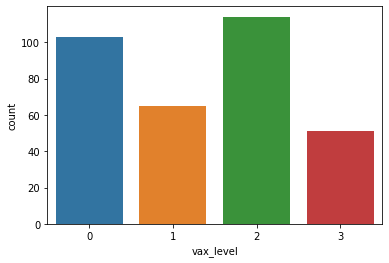

In [107]:
ax = sns.countplot(y, label='Count')
Very_high, high, median, low = y.value_counts() 
print('Number of Very high: ', Very_high)
print('Number of high: ', high)
print('Number of median: ', median)
print('Number of low: ', low)

In [108]:
data.drop('town', inplace = True, axis=1)
cor = data.corr()
rela = cor['vax_level'].sort_values(ascending=False)
rela

vax_level                                                1.000000
income_average_per_resident_2010                         0.188008
education_spending_per_resident_2012                     0.187963
expenditures_per_resident_2012                           0.185837
trucks_per_1000_residents_2012                           0.139893
                                                           ...   
firefighter_costs_per_resident_2012                     -0.063992
households_one-person_2010                              -0.069444
condos_as_perc_of_parcels_2012                          -0.072637
apartments_condos_multis_per_residential_parcels_2011   -0.078509
fire_dept_spending_as_a_percent_2012                    -0.131194
Name: vax_level, Length: 66, dtype: float64

In [109]:
# plt.subplots(figsize=(15,15))
# sns.heatmap(cor, annot=True)

In [110]:
x = []
for i in range(len(rela)):
    if rela[i] > 0.08:
        x.append(rela.index[i])
x

['vax_level',
 'income_average_per_resident_2010',
 'education_spending_per_resident_2012',
 'expenditures_per_resident_2012',
 'trucks_per_1000_residents_2012',
 'teacher_salaries_by_average_2011',
 'police_costs_per_resident_2013',
 'culture_and_rec_spending_per_person_2012',
 'pupils_per_cost_average_by_district_2011-2012',
 'police_employees_per_10000_residents_2011',
 'cars_per_1000_residents_2012',
 'households_average_size_2010']

In [111]:
# take the first couple good columns, remove the vax_level column 
x = data[['vax_level', 'income_average_per_resident_2010',
 'education_spending_per_resident_2012',
 'expenditures_per_resident_2012',
 'trucks_per_1000_residents_2012',
 'teacher_salaries_by_average_2011',
 'police_costs_per_resident_2013',
 'culture_and_rec_spending_per_person_2012',
 'pupils_per_cost_average_by_district_2011-2012',
 'police_employees_per_10000_residents_2011',
 'cars_per_1000_residents_2012',
 'households_average_size_2010']]
x

,vax_level,income_average_per_resident_2010,education_spending_per_resident_2012,expenditures_per_resident_2012,trucks_per_1000_residents_2012,teacher_salaries_by_average_2011,police_costs_per_resident_2013,culture_and_rec_spending_per_person_2012,pupils_per_cost_average_by_district_2011-2012,police_employees_per_10000_residents_2011,cars_per_1000_residents_2012,households_average_size_2010
0,2,29299,1218.0,2315.0,354,73887.0,154.0,35.0,11855.0,16.2,435.7,2.61
1,0,55496,2336.0,3474.0,280,75741.0,149.0,88.0,11669.0,20.4,486.8,2.66
2,1,25483,1353.0,2120.0,379,57227.0,145.0,25.0,11533.0,16.4,476.4,2.62
3,2,18626,538.0,1010.0,366,58937.0,98.0,59.0,12465.5,22.3,375.1,2.17
4,2,25179,1208.0,2581.0,328,60647.0,149.0,40.0,13398.0,21.3,487.5,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...
328,0,31125,1267.0,2704.0,350,66669.0,215.0,44.0,13663.0,20.6,491.9,2.43
329,2,18344,1230.0,2409.0,200,86005.0,224.0,45.0,13489.0,25.5,358.8,2.46
330,2,27579,1390.5,2658.5,495,76949.5,194.5,40.0,12392.5,21.8,491.3,2.21
331,0,43645,1551.0,2908.0,379,67894.0,165.0,35.0,11296.0,18.1,426.4,2.81


*** this new dataset x is unbalanced ***

In [112]:
x['vax_level'].value_counts()

2    114
0    103
1     65
3     51
Name: vax_level, dtype: int64

In [113]:
max_size = x['vax_level'].value_counts().max()
max_size

114

***over sampling to make the data balanced***

In [126]:
lst = [x]
for class_index, group in x.groupby('vax_level'):
    lst.append(group.sample(max_size-len(group), replace=True))
x_new = pd.concat(lst)
x_new['vax_level'].value_counts()

3    114
2    114
1    114
0    114
Name: vax_level, dtype: int64

In [127]:
y = x_new['vax_level']
y

0      2
1      0
2      1
3      2
4      2
      ..
55     3
302    3
166    3
187    3
297    3
Name: vax_level, Length: 456, dtype: int32

In [128]:
x_new.drop('vax_level', inplace=True, axis=1)
x_new.head()

,income_average_per_resident_2010,education_spending_per_resident_2012,expenditures_per_resident_2012,trucks_per_1000_residents_2012,teacher_salaries_by_average_2011,police_costs_per_resident_2013,culture_and_rec_spending_per_person_2012,pupils_per_cost_average_by_district_2011-2012,police_employees_per_10000_residents_2011,cars_per_1000_residents_2012,households_average_size_2010
0,29299,1218.0,2315.0,354,73887.0,154.0,35.0,11855.0,16.2,435.7,2.61
1,55496,2336.0,3474.0,280,75741.0,149.0,88.0,11669.0,20.4,486.8,2.66
2,25483,1353.0,2120.0,379,57227.0,145.0,25.0,11533.0,16.4,476.4,2.62
3,18626,538.0,1010.0,366,58937.0,98.0,59.0,12465.5,22.3,375.1,2.17
4,25179,1208.0,2581.0,328,60647.0,149.0,40.0,13398.0,21.3,487.5,2.38


In [129]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y, test_size = 0.25, random_state=42)

In [130]:
results = pd.DataFrame()
Name = []
Accuracy = []

In [131]:
cla = RandomForestClassifier(n_estimators = 10, random_state = 42)
cla.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=10, random_state=42)

In [132]:
predicted = cla.predict(xtest)
predicted

array([1, 3, 0, 1, 2, 1, 0, 0, 3, 2, 0, 2, 1, 1, 1, 3, 2, 0, 3, 3, 1, 3,
       0, 1, 2, 3, 0, 3, 1, 3, 1, 0, 3, 2, 3, 2, 3, 3, 3, 0, 1, 2, 3, 1,
       2, 3, 2, 1, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3, 1, 3, 3, 2, 1, 3, 3, 2,
       0, 1, 2, 1, 0, 3, 1, 1, 1, 3, 1, 3, 3, 0, 1, 0, 1, 1, 3, 3, 3, 0,
       2, 1, 0, 3, 0, 2, 1, 3, 2, 0, 3, 2, 3, 1, 0, 2, 1, 1, 3, 1, 1, 1,
       0, 0, 1, 0])

In [133]:
accu= round(accuracy_score(ytest, predicted)*100, 4)
print(accu,"%")

67.5439 %


In [134]:
Name.append('RandomForest()')
Accuracy.append(accu)

In [135]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

C:\Users\Li Xu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
predicted = lr.predict(xtest)
predicted

array([1, 0, 2, 1, 2, 2, 2, 0, 3, 1, 0, 0, 1, 1, 1, 2, 1, 0, 3, 0, 1, 3,
       2, 2, 2, 3, 3, 3, 1, 3, 1, 0, 3, 2, 0, 2, 3, 1, 3, 0, 1, 2, 0, 1,
       2, 3, 1, 3, 3, 3, 3, 0, 1, 3, 3, 0, 1, 0, 2, 3, 3, 2, 1, 3, 3, 1,
       0, 1, 1, 1, 3, 0, 2, 1, 0, 3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 2, 2, 0,
       0, 1, 2, 0, 2, 1, 1, 3, 1, 2, 3, 0, 3, 1, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 0])

In [137]:
accu_lr = round(accuracy_score(ytest, predicted)*100, 2)
accu_lr

59.65

In [138]:
Name.append(lr)
Accuracy.append(accu_lr)

In [139]:
# Final result with unbalanced data are:
results['Name'] = Name
results['Accuracy'] = Accuracy
results

,Name,Accuracy
0,RandomForest(),67.5439
1,LogisticRegression(),59.6500


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'apartments_condos_multis_per_residential_parcels_2011'),
  Text(1, 0, 'assessed_home_value_changes_2009-2013'),
  Text(2, 0, 'births_per_1000_residents_2010'),
  Text(3, 0, 'boaters_per_10000_residents_2012'),
  Text(4, 0, 'burglaries_per_10000_residents_2011'),
  Text(5, 0, 'cars_motorcycles_&_trucks_average_age_2012'),
  Text(6, 0, 'cars_per_1000_residents_2012'),
  Text(7, 0, 'class_size_in_school_district_2011-2012'),
  Text(8, 0, 'condos_as_perc_of_parcels_2012'),
  Text(9, 0, 'crashes_per_1000_residents_2007-2011')])

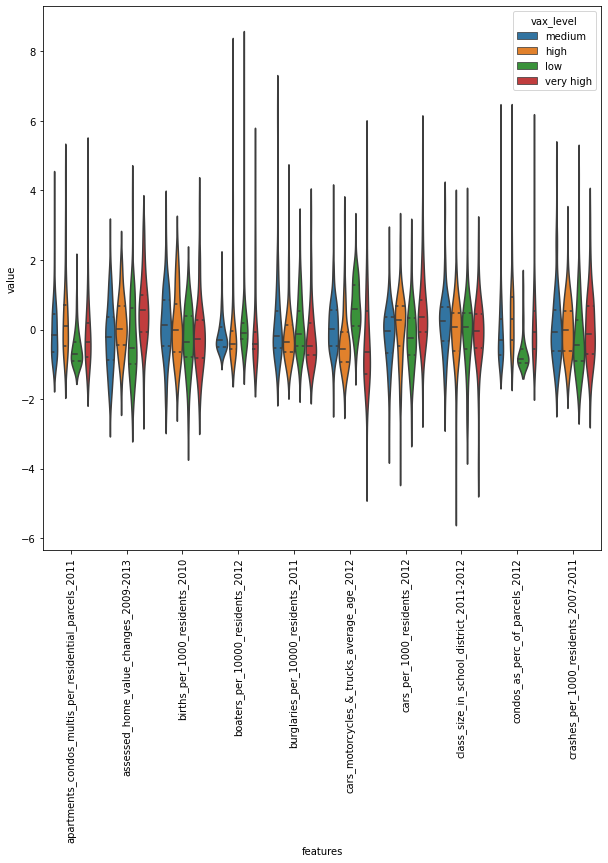

In [38]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y, data_n_2.iloc[:,0:10]], axis=1)
data = pd.melt(data, id_vars='vax_level',
                     var_name='features',
                     value_name='value')
plt.figure(figsize=(10, 10))
sns.violinplot(x='features', y='value', hue='vax_level', data=data, split=False, inner='quart')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'apartments_condos_multis_per_residential_parcels_2011'),
  Text(1, 0, 'assessed_home_value_changes_2009-2013'),
  Text(2, 0, 'births_per_1000_residents_2010'),
  Text(3, 0, 'boaters_per_10000_residents_2012'),
  Text(4, 0, 'burglaries_per_10000_residents_2011'),
  Text(5, 0, 'cars_motorcycles_&_trucks_average_age_2012'),
  Text(6, 0, 'cars_per_1000_residents_2012'),
  Text(7, 0, 'class_size_in_school_district_2011-2012'),
  Text(8, 0, 'condos_as_perc_of_parcels_2012'),
  Text(9, 0, 'crashes_per_1000_residents_2007-2011')])

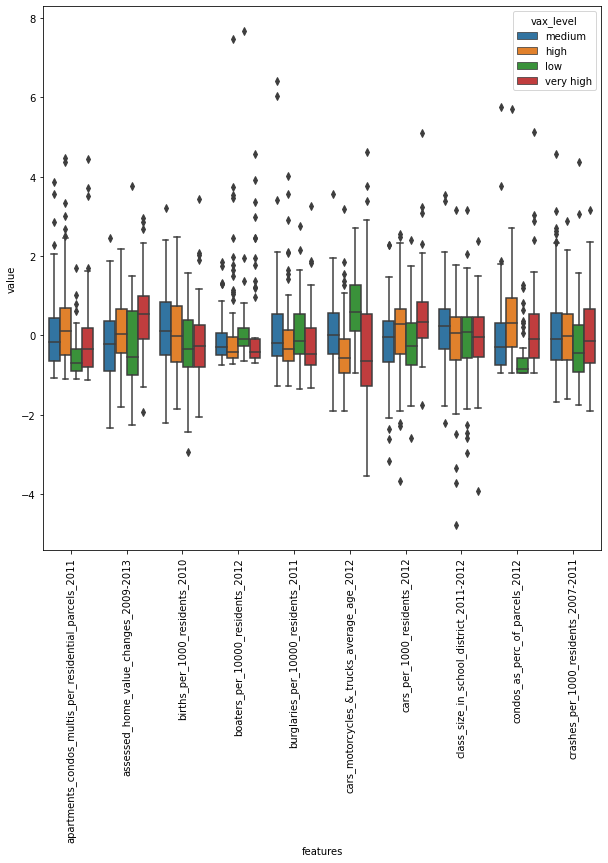

In [44]:
plt.figure(figsize=(10,10))
sns.boxplot(x='features', y='value', hue='vax_level', data=data)
plt.xticks(rotation=90)

In [4]:
data.shape

(333, 67)

base on the observation between violent_crimes_per_10000_residents_2012 and vax_level, roughly when the 
violent is high, val_level is low. We want to build a model to predict the vax_level.

In [5]:
data.sort_values('violent_crimes_per_10000_residents_2012').tail(5)

,town,apartments_condos_multis_per_residential_parcels_2011,assessed_home_value_changes_2009-2013,births_per_1000_residents_2010,boaters_per_10000_residents_2012,burglaries_per_10000_residents_2011,cars_motorcycles_&_trucks_average_age_2012,cars_per_1000_residents_2012,class_size_in_school_district_2011-2012,condos_as_perc_of_parcels_2012,...,teachers_percent_under_40_years_old_2011-2012,trucks_per_1000_residents_2012,violent_crimes_per_10000_residents_2012,voters_as_a_percent_of_population_2012,voters_change_in_registrations_between_1982-2012,voters_democrats_as_a_percent_2012,2020_votes,2020_biden_margin,population,vax_level
265,Springfield,0.283,-0.087,14.9,76.6,163.2,11.8,363.3,17.3,0.045,...,0.37,209,103.9,94641,0.29,52.6,54373,47.0,38388.0,2
92,Fall River,0.509,-0.162,13.0,106.2,97.0,10.8,395.3,20.2,0.088,...,0.42,233,106.3,50556,0.20,54.3,31616,12.0,23157.0,2
188,New Bedford,0.423,-0.199,13.5,105.5,101.8,11.1,369.3,18.3,0.043,...,0.31,223,107.3,53519,0.14,50.1,34877,24.0,25842.0,1
42,Brockton,0.265,-0.230,15.1,57.8,109.9,10.9,365.3,19.9,0.079,...,0.39,222,114.3,55039,0.37,50.9,38712,54.0,25799.0,2
55,Chelsea,0.833,-0.057,18.6,38.4,110.5,6.3,452.1,21.2,0.285,...,0.50,282,185.2,14271,0.13,53.4,10524,56.0,11744.0,4


In [6]:
data['vax_level'].value_counts()

2    114
3    103
1     65
4     51
Name: vax_level, dtype: int64

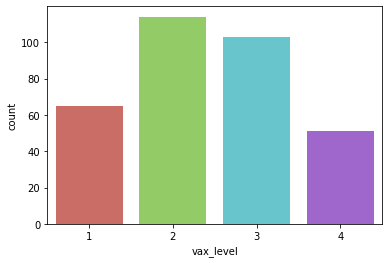

In [7]:
sns.countplot(x='vax_level', data=data, palette='hls')
plt.show()

In [8]:
count_medium = len(data[data['vax_level']== 2])
count_high = len(data[data['vax_level']== 3])
count_low = len(data[data['vax_level']== 1])
count_very_high = len(data[data['vax_level']== 4])
total_len = len(data['vax_level'])
print("percentage of medium is", count_medium/total_len * 100)
print("percentage of high is", count_high/total_len * 100)
print("percentage of very high is", count_very_high/total_len * 100)
print("percentage of low is", count_low/total_len * 100)

percentage of medium is 34.234234234234236
percentage of high is 30.930930930930934
percentage of very high is 15.315315315315313
percentage of low is 19.51951951951952


Classes are imbalanced

In [9]:
data.groupby('vax_level').mean()

,apartments_condos_multis_per_residential_parcels_2011,assessed_home_value_changes_2009-2013,births_per_1000_residents_2010,boaters_per_10000_residents_2012,burglaries_per_10000_residents_2011,cars_motorcycles_&_trucks_average_age_2012,cars_per_1000_residents_2012,class_size_in_school_district_2011-2012,condos_as_perc_of_parcels_2012,crashes_per_1000_residents_2007-2011,...,teacher_salaries_by_average_2011,teachers_percent_under_40_years_old_2011-2012,trucks_per_1000_residents_2012,violent_crimes_per_10000_residents_2012,voters_as_a_percent_of_population_2012,voters_change_in_registrations_between_1982-2012,voters_democrats_as_a_percent_2012,2020_votes,2020_biden_margin,population
vax_level,,,,,,,,,,,,,,,,,,,,,
1,0.089077,-0.117690,8.356923,443.543846,49.222821,10.658462,437.836923,18.375590,0.027508,80.990769,...,65398.404615,0.348897,403.307692,23.602103,5146.553846,0.664462,25.252308,4256.538462,10.812308,2068.830769
2,0.170202,-0.115338,9.588596,315.470175,51.886404,10.078947,440.087719,19.105073,0.074066,94.853509,...,66920.189620,0.345247,360.140351,28.740029,16908.368421,0.641316,28.883333,13398.605263,19.445088,7241.719298
3,0.211796,-0.094026,9.401942,380.531068,42.683333,9.580583,452.584466,18.364725,0.113073,92.380583,...,68262.106796,0.347372,340.708738,19.693528,15159.087379,0.495146,29.715534,13149.184466,33.953010,6068.359223
4,0.167294,-0.065451,8.743137,482.268627,39.252614,9.711765,479.856863,18.382190,0.099627,93.678431,...,72552.227124,0.346944,397.784314,18.186601,9921.333333,0.438824,29.735294,9035.490196,45.529412,3334.058824


In [10]:
correlation_data = data.corr()
correlation_data['vax_level'] = correlation_data['vax_level'].abs()
temp = correlation_data.sort_values(by='vax_level', ascending=False).tail(40)
worst_n_variables = []
for row in temp.index:
    worst_n_variables.append(row)
#worst_n_variables

In [11]:
for var in worst_n_variables:
    data = data.drop(var, axis=1)

In [12]:
data.shape

(333, 27)

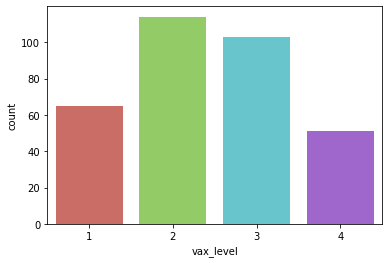

In [13]:
sns.countplot(x='vax_level', data=data, palette='hls')
plt.show()

In [14]:
data['vax_level'].value_counts()

2    114
3    103
1     65
4     51
Name: vax_level, dtype: int64

In [15]:
data.columns.values
data.drop('town', axis=1)

,assessed_home_value_changes_2009-2013,cars_motorcycles_&_trucks_average_age_2012,cars_per_1000_residents_2012,condos_as_perc_of_parcels_2012,culture_and_rec_spending_per_person_2012,education_spending_per_resident_2012,expenditures_per_resident_2012,females_percent_in_community_2010,firefighter_costs_per_resident_2012,gun_licenses_per_1000_residents_2012,...,police_costs_per_resident_2013,police_employees_per_10000_residents_2011,population_change_2010-2011,pupils_per_cost_average_by_district_2011-2012,single-person_households_percent_65_and_older,snowmobiles_per_10000_residents_2012,state_aid_as_a_percent_of_town_budget_2012,teacher_salaries_by_average_2011,2020_biden_margin,vax_level
0,-0.149,9.9,435.7,0.1290,35.0,1218.0,2315.0,51.1,106.0,51.20,...,154.0,16.2,0.005,11855.0,35.6,5.0,19.4,73887.0,10.0,2
1,-0.004,8.5,486.8,0.2730,88.0,2336.0,3474.0,50.9,115.0,35.50,...,149.0,20.4,0.010,11669.0,31.9,3.2,8.7,75741.0,62.0,3
2,-0.188,10.9,476.4,0.0000,25.0,1353.0,2120.0,50.9,38.0,89.00,...,145.0,16.4,0.001,11533.0,47.1,3.9,26.8,57227.0,-10.0,1
3,-0.051,10.0,375.1,0.0060,59.0,538.0,1010.0,51.8,1.0,107.40,...,98.0,22.3,-0.006,12465.5,44.3,251.4,15.1,58937.0,33.0,2
4,-0.107,9.7,487.5,0.1440,40.0,1208.0,2581.0,52.2,121.0,78.75,...,149.0,21.3,0.001,13398.0,42.8,41.8,26.3,60647.0,-1.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,-0.022,9.3,491.9,0.1250,44.0,1267.0,2704.0,51.6,172.0,39.90,...,215.0,20.6,0.010,13663.0,37.6,0.3,8.6,66669.0,23.0,3
329,-0.197,10.1,358.8,0.0625,45.0,1230.0,2409.0,51.3,176.0,21.50,...,224.0,25.5,0.003,13489.0,33.4,6.6,43.2,86005.0,38.0,2
330,-0.090,10.8,491.3,0.0000,40.0,1390.5,2658.5,50.6,168.0,250.40,...,194.5,21.8,-0.002,12392.5,35.3,563.3,6.5,76949.5,34.0,2
331,-0.101,9.6,426.4,0.0510,35.0,1551.0,2908.0,50.7,160.0,76.30,...,165.0,18.1,0.007,11296.0,42.5,10.0,12.8,67894.0,12.0,3


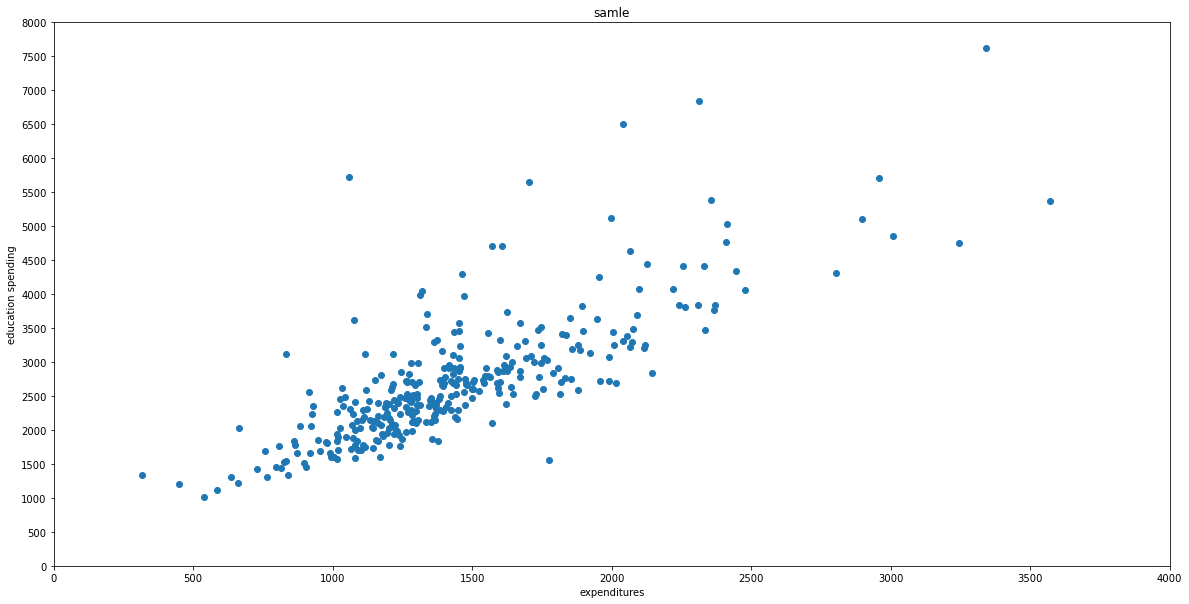

In [48]:
X = data[['education_spending_per_resident_2012', 'expenditures_per_resident_2012']]

plt.scatter(X['education_spending_per_resident_2012'], X['expenditures_per_resident_2012'])
plt.title('samle')
plt.ylabel('education spending')
plt.xlabel('expenditures')
plt.xticks(np.arange(0, max(data['education_spending_per_resident_2012'])+500, 500))
plt.yticks(np.arange(0, max(data['expenditures_per_resident_2012'])+500, 500))
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

***K-Means Clustering***

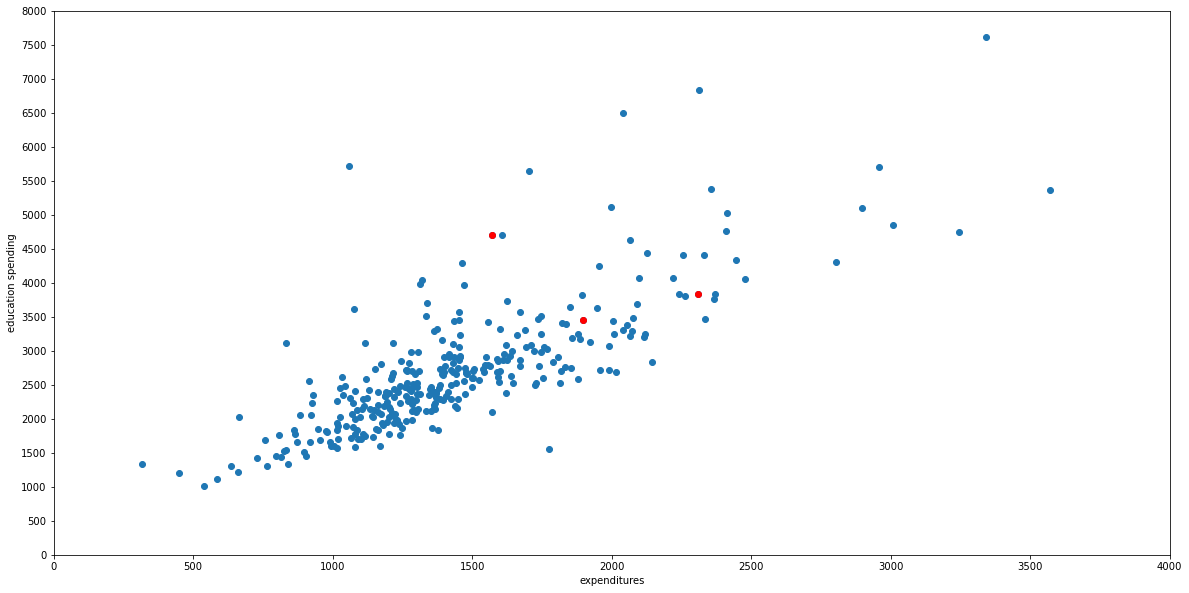

In [52]:
k=3
Centroids = (X.sample(n=k))
plt.scatter(X['education_spending_per_resident_2012'], X['expenditures_per_resident_2012'])
plt.scatter(Centroids['education_spending_per_resident_2012'], Centroids['expenditures_per_resident_2012'], c='red')
plt.ylabel('education spending')
plt.xlabel('expenditures')
plt.xticks(np.arange(0, max(data['education_spending_per_resident_2012'])+500, 500))
plt.yticks(np.arange(0, max(data['expenditures_per_resident_2012'])+500, 500))
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [56]:
from sklearn.cluster import KMeans

In [ ]:
X = data.loc[:, data.columns != 'vax_level']
y = data.loc[:, data.columns == 'vax_level']

In [242]:
from imblearn.over_sampling import SMOTE

In [59]:
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)

In [157]:
 def lengthOfLastWord(s):        
        if len(s) == 0:
            return 0
        if len(s) == 1:
            return 1
        print(len(s))
        a = s.strip()
        print(len(a))
        count = 0
        for i in range(len(a)-1, 0, -1):
            print("here")
            print(a[i])
            if a[i] != ' ':
                count = count + 1
            else:
                return count
        return count

In [158]:
lengthOfLastWord("a")

1

In [161]:
for i in range(4, -1, -1):
    print(i)

4
3
2
1
0
